### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.regressionplots import influence_plot

### Read/import data

In [2]:
cars_data = pd.read_csv('Cars.csv')

### Initial Analysis

In [3]:
cars_data.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [4]:
cars_data.tail()

,HP,MPG,VOL,SP,WT
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099
80,236,12.101263,107,139.840817,34.948615


In [5]:
cars_data.shape

(81, 5)

In [6]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [7]:
cars_data.describe(include='all')

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [8]:
cars_data.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

### Assumptions Check

#### 1. Data Should be Linear in Nature

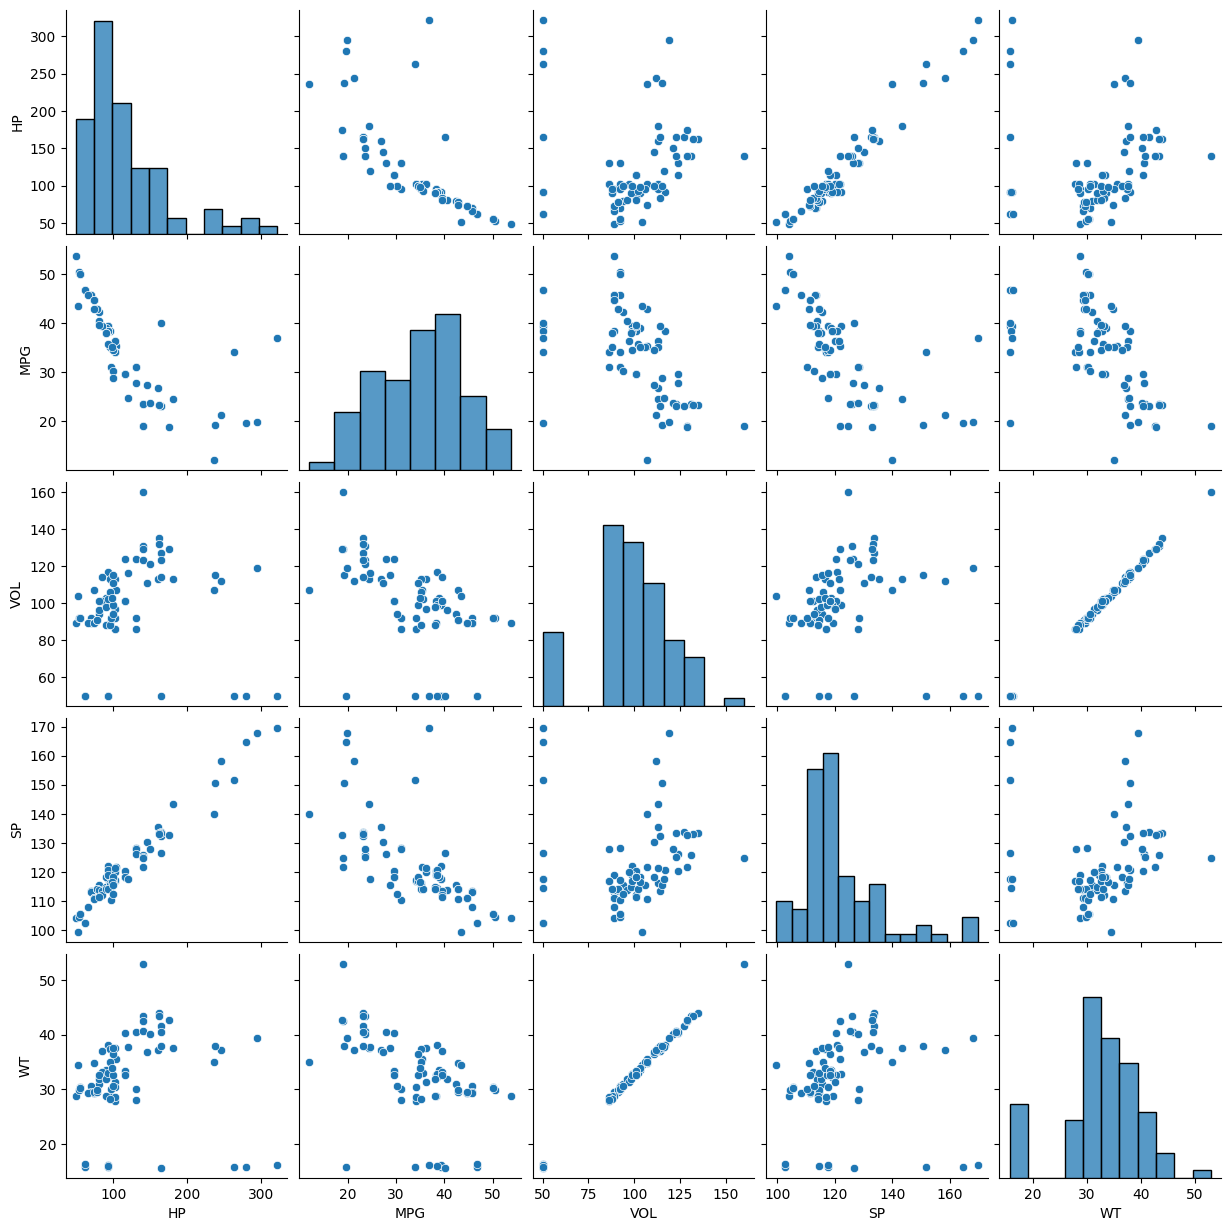

In [9]:
sns.pairplot(cars_data)
plt.show()

#### 2. Homoscedasticity

### Model Preparation

In [10]:
cars_data.columns

Index(['HP', 'MPG', 'VOL', 'SP', 'WT'], dtype='object')

In [11]:
model = smf.ols(formula="MPG~WT+SP+VOL+HP",data=cars_data).fit()

In [12]:
model.params

Intercept    30.677336
WT            0.400574
SP            0.395627
VOL          -0.336051
HP           -0.205444
dtype: float64

## Hypothesis Formulation

- H0: Feature is Not Important
- Ha: Feature is important

In [13]:
model.pvalues

Intercept    0.042936
WT           0.813649
SP           0.014579
VOL          0.556294
HP           0.000001
dtype: float64

In [14]:
## R-squared & Adjusted R-Squared
model.rsquared, model.rsquared_adj

(np.float64(0.7705372737359842), np.float64(0.7584602881431413))

In [15]:
model.resid

0     10.258747
1      7.624608
2      7.734060
3      3.157963
4      8.331584
        ...    
76    15.617904
77     1.298838
78     7.863547
79     7.517122
80    -3.458218
Length: 81, dtype: float64

In [16]:
import statsmodels.api as sm

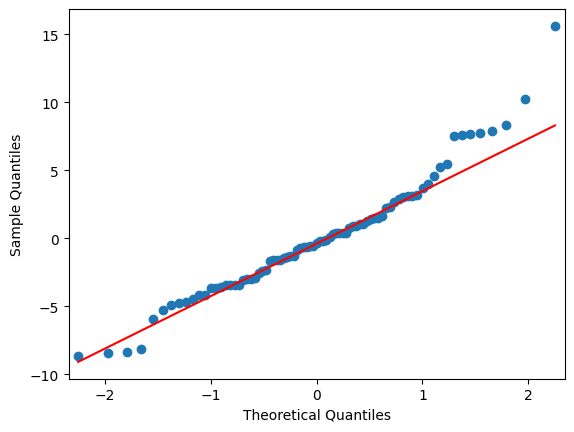

In [17]:
sm.qqplot(model.resid,line='q')
plt.show()

### Detect the outliers/incluencers

#### Cook's Distance Method

In [19]:
model_influence = model.get_influence()
c,_=model_influence.cooks_distance

In [21]:
c

array([6.04797739e-02, 2.80207825e-02, 1.84833331e-02, 7.27752720e-03,
       2.96019879e-02, 4.81278004e-03, 2.07405847e-02, 2.55586700e-03,
       4.05692942e-03, 7.54004910e-04, 2.97311924e-03, 8.72887201e-02,
       3.32487183e-04, 3.06716174e-03, 5.27414633e-03, 5.29293219e-03,
       1.16531605e-03, 7.63273362e-02, 6.47114749e-04, 5.79692771e-04,
       1.13359020e-05, 1.03054091e-02, 1.53244850e-04, 3.10730928e-04,
       1.49488694e-03, 5.85742198e-02, 1.00598054e-02, 6.55605611e-05,
       3.30438001e-02, 1.81295962e-04, 1.33814932e-02, 9.97753151e-04,
       4.02570308e-04, 1.13711936e-03, 2.85608656e-03, 4.41332141e-05,
       3.27632348e-04, 4.70959014e-03, 1.21704644e-02, 8.96948188e-03,
       2.35324656e-04, 9.75839299e-06, 4.49488700e-03, 4.48437031e-03,
       1.02593360e-05, 4.75617324e-04, 2.22586830e-05, 4.66305687e-05,
       1.27051048e-02, 5.33728062e-03, 2.98638028e-03, 5.00671925e-03,
       1.29659561e-04, 1.14393086e-02, 8.61438068e-04, 2.46695414e-04,
      

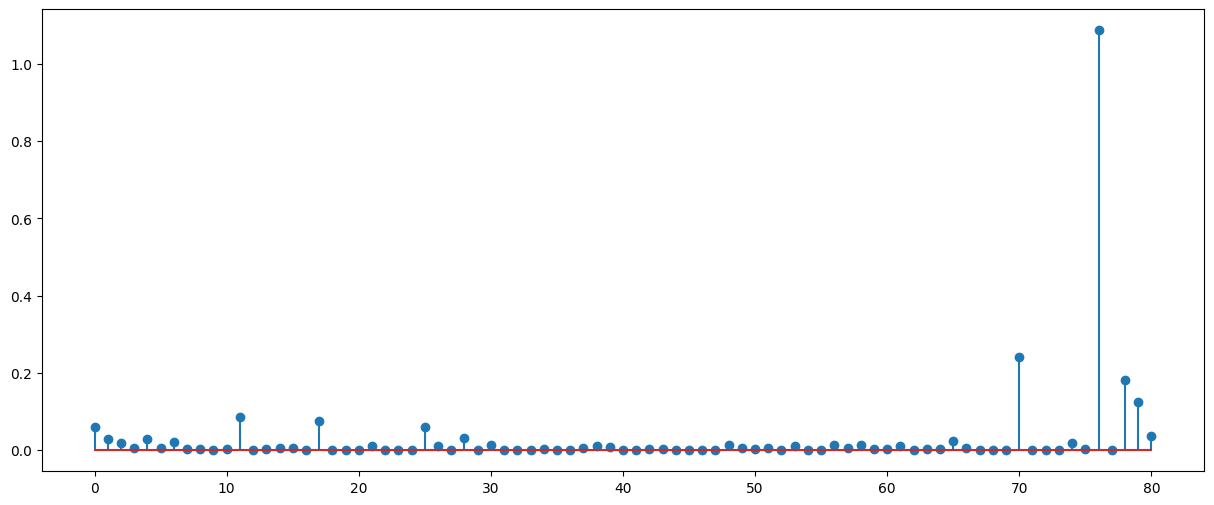

In [25]:
plt.figure(figsize=(15,6))
plt.stem(np.arange(len(cars_data)),np.round(c,3))
plt.show()

In [29]:
cars_data.drop(cars_data.index[[70,76]],axis=0,inplace=True)

In [31]:
cars_data.tail(10)

,HP,MPG,VOL,SP,WT
69,245,21.273708,112,158.300669,37.141733
71,162,23.203569,135,133.415985,44.013139
72,162,23.203569,132,133.140074,43.353123
73,140,19.086341,160,124.715241,52.997752
74,140,19.086341,129,121.864163,42.618698
75,175,18.762837,129,132.864163,42.778219
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099
80,236,12.101263,107,139.840817,34.948615


In [40]:
cars_data = cars_data.reset_index()

In [41]:
cars_data.tail(10)

,level_0,index,HP,MPG,VOL,SP,WT
69,69,69,245,21.273708,112,158.300669,37.141733
70,70,70,162,23.203569,135,133.415985,44.013139
71,71,71,162,23.203569,132,133.140074,43.353123
72,72,72,140,19.086341,160,124.715241,52.997752
73,73,73,140,19.086341,129,121.864163,42.618698
74,74,74,175,18.762837,129,132.864163,42.778219
75,75,75,238,19.197888,115,150.576579,37.923113
76,76,76,263,34.000000,50,151.598513,15.769625
77,77,77,295,19.833733,119,167.944460,39.423099
78,78,78,236,12.101263,107,139.840817,34.948615


In [42]:
cars_data.drop(['level_0','index'],axis=1,inplace=True)

In [43]:
cars_data.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [44]:
model2 = smf.ols(formula="MPG~WT+SP+VOL+HP",data=cars_data).fit()

In [45]:
model2.rsquared,model2.rsquared_adj

(np.float64(0.8161875290800861), np.float64(0.8062517198411718))

### 3. No Multicollinearity

In [47]:
cars_data.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.806690,0.321408,0.964963,0.320823
MPG,-0.806690,1.000000,-0.615475,-0.754840,-0.613903
VOL,0.321408,-0.615475,1.000000,0.351519,0.999098
SP,0.964963,-0.754840,0.351519,1.000000,0.352585
WT,0.320823,-0.613903,0.999098,0.352585,1.000000


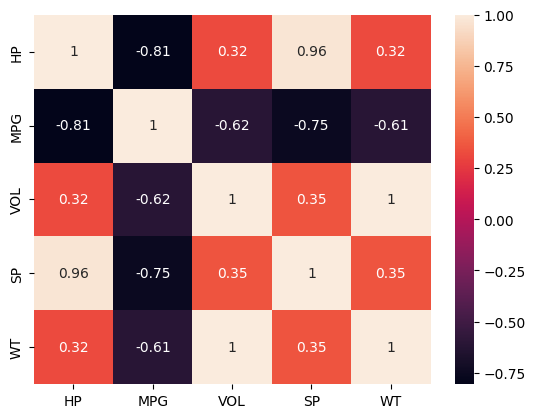

In [49]:
cars_corr = cars_data.corr()

sns.heatmap(cars_corr,annot=True)
plt.show()

### 4. No AutoRegression (Should not influenced by time)

- Not relevant to data

#### 5. Zero Residual Mean

In [53]:
np.mean(model2.resid).round(4)

np.float64(-0.0)

In [ ]:
-0.0000000000000489

In [54]:
model = LinearRegression()

In [55]:
cars_data.columns

Index(['HP', 'MPG', 'VOL', 'SP', 'WT'], dtype='object')

In [56]:
x = cars_data[['HP','VOL', 'SP', 'WT']]
y = cars_data['MPG']

In [59]:
model.fit(x,y)

LinearRegression()

In [60]:
cars_data.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [61]:
x_test = pd.DataFrame({'HP':[51,52,43],'VOL':[85,79,81],'SP':[100,250,101],'WT':[20.012,31.254,22.]})

In [62]:
model.predict(x_test)

array([ 43.48355714, 109.12284286,  46.05884801])